In [4]:
from google.colab import files
uploaded = files.upload()


Saving jordan-airports-historical-observations.csv to jordan-airports-historical-observations.csv


In [5]:
import pandas as pd
df = pd.read_csv("jordan-airports-historical-observations.csv", encoding='ISO-8859-1')
df.head()


,time,lat,lng,identifier,temperature,dew_point,wind_speed,wind_direction,visibility
0,2019-01-01 00:00:00+00:00,31.983299,35.983299,icao:OJAM,7.0,3.0,1.54,120.0,5000.0
1,2019-01-01 00:00:00+00:00,31.983299,35.983299,icao:OJAM,7.0,3.0,1.54,120.0,5000.0
2,2019-01-01 00:00:00+00:00,31.983299,35.983299,icao:OJAM,7.0,3.0,1.54,120.0,5000.0
3,2019-01-01 01:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,3.0,1.54,120.0,9999.0
4,2019-01-01 01:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,3.0,1.54,120.0,9999.0


In [ ]:
unique=df['identifier'].unique()
unique

array(['icao:OJAM'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132777 entries, 0 to 132776
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   time            132777 non-null  object 
 1   lat             132777 non-null  float64
 2   lng             132777 non-null  float64
 3   identifier      132777 non-null  object 
 4   temperature     132435 non-null  float64
 5   dew_point       132432 non-null  float64
 6   wind_speed      132756 non-null  float64
 7   wind_direction  131010 non-null  float64
 8   visibility      132693 non-null  float64
dtypes: float64(7), object(2)
memory usage: 9.1+ MB


In [ ]:
# Assuming your data is in a DataFrame called 'df' and the column is named 'time'
df['time'] = pd.to_datetime(df['time'])

# Now, 'time' column is converted to datetime format


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132777 entries, 0 to 132776
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   time            132777 non-null  datetime64[ns, UTC]
 1   lat             132777 non-null  float64            
 2   lng             132777 non-null  float64            
 3   identifier      132777 non-null  object             
 4   temperature     132435 non-null  float64            
 5   dew_point       132432 non-null  float64            
 6   wind_speed      132756 non-null  float64            
 7   wind_direction  131010 non-null  float64            
 8   visibility      132693 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 9.1+ MB


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43311 entries, 0 to 44258
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   time            43311 non-null  datetime64[ns, UTC]
 1   lat             43311 non-null  float64            
 2   lng             43311 non-null  float64            
 3   identifier      43311 non-null  object             
 4   temperature     43202 non-null  float64            
 5   dew_point       43201 non-null  float64            
 6   wind_speed      43305 non-null  float64            
 7   wind_direction  42728 non-null  float64            
 8   visibility      43284 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 3.3+ MB


In [ ]:
uniquelat=df['lat'].unique()
uniquelat

array([31.98329926])

In [ ]:
df['lat'].isnull().sum()

0

In [ ]:
uniquelng=df['lng'].unique()
uniquelng

array([35.98329926])

In [ ]:
df['lng'].isnull().sum()

0

In [ ]:
unique=df['identifier'].unique()
unique

array(['icao:OJAM'], dtype=object)

In [ ]:
unique_tem=df['temperature'].unique()
unique_tem

array([ 7.,  8.,  9., 11., 12., 13., 14., 10.,  6.,  5., 15., 16., nan,
        4.,  3.,  2.,  1.,  0., 19., 18., 17., 20., 21., 22., 23., 24.,
       26., 27., 25., 28., 29., 30., 31., 32., 34., 33., 35., 36., 37.,
       38., 39., 40., 41., 42., 43.])

In [ ]:
df['temperature'].isnull().sum()

109

In [ ]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
# Replace 'temperature_column_name' with the actual column name containing the 'temperature' values
rows_with_nan_indices = df[df['temperature'].isnull()].index

# Display or further process the row indices with NaN values in the 'temperature' column
print("Row indices with NaN values in the 'temperature' column:")
print(rows_with_nan_indices)


Row indices with NaN values in the 'temperature' column:
Int64Index([  343,  1172,  1174,  1507,  2405,  2905,  3269,  3422,  3967,
             4138,
            ...
            38495, 38726, 40080, 40205, 41514, 41516, 42910, 42911, 42913,
            44111],
           dtype='int64', length=109)


In [ ]:
df['temperature'] = df['temperature'].interpolate()


<ipython-input-211-f5d7ef591ec7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temperature'] = df['temperature'].interpolate()


In [ ]:
df['temperature'].isnull().sum()

0

In [ ]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
# Assuming 'temperature' is the column with missing values

# Create a new column to store the original values before interpolation
df['temperature_original'] = df['temperature']

# Use interpolate to fill missing values
df['temperature'] = df['temperature'].interpolate(limit_area='inside', limit_direction='both')

# Indices of interest
indices_of_interest = [343, 345, 1172, 1174, 1507, 2405, 2905, 3269, 3422, 3967, 4138]

# Filter indices that are present in the DataFrame
valid_indices = set(indices_of_interest).intersection(df.index)

# Extract the predicted values for the valid indices
predicted_values = df.loc[valid_indices, 'temperature']

# Display the indices and predicted values
for index, value in predicted_values.iteritems():
    print(f"Index: {index}, Predicted Value: {value}")


Index: 1507, Predicted Value: 13.5
Index: 2405, Predicted Value: 11.0
Index: 3269, Predicted Value: 20.0
Index: 4138, Predicted Value: 17.5
Index: 1172, Predicted Value: 2.5
Index: 1174, Predicted Value: 1.5
Index: 343, Predicted Value: 7.5
Index: 2905, Predicted Value: 14.0
Index: 3422, Predicted Value: 12.5
Index: 3967, Predicted Value: 20.0


<ipython-input-213-322fa13996cf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temperature_original'] = df['temperature']
<ipython-input-213-322fa13996cf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temperature'] = df['temperature'].interpolate(limit_area='inside', limit_direction='both')


In [ ]:
df

,time,lat,lng,identifier,temperature,dew_point,wind_speed,wind_direction,visibility,temperature_original
0,2019-01-01 00:00:00+00:00,31.983299,35.983299,icao:OJAM,7.0,3.0,1.54,120.0,5000.0,7.0
3,2019-01-01 01:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,3.0,1.54,120.0,9999.0,8.0
6,2019-01-01 02:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,3.0,1.54,120.0,9999.0,8.0
9,2019-01-01 04:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,2.0,2.57,150.0,9999.0,8.0
12,2019-01-01 05:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,2.0,3.60,130.0,9999.0,8.0
...,...,...,...,...,...,...,...,...,...,...
44254,2023-11-12 04:00:00+00:00,31.983299,35.983299,icao:OJAM,19.0,9.0,1.03,NaN,5000.0,19.0
44255,2023-11-12 04:25:00+00:00,31.983299,35.983299,icao:OJAM,18.0,9.0,0.00,0.0,3000.0,18.0
44256,2023-11-12 05:00:00+00:00,31.983299,35.983299,icao:OJAM,18.0,9.0,0.00,0.0,3000.0,18.0
44257,2023-11-12 06:00:00+00:00,31.983299,35.983299,icao:OJAM,20.0,9.0,0.00,0.0,3000.0,20.0


In [ ]:
df.drop('temperature_original',axis=1)

,time,lat,lng,identifier,temperature,dew_point,wind_speed,wind_direction,visibility
0,2019-01-01 00:00:00+00:00,31.983299,35.983299,icao:OJAM,7.0,3.0,1.54,120.0,5000.0
3,2019-01-01 01:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,3.0,1.54,120.0,9999.0
6,2019-01-01 02:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,3.0,1.54,120.0,9999.0
9,2019-01-01 04:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,2.0,2.57,150.0,9999.0
12,2019-01-01 05:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,2.0,3.60,130.0,9999.0
...,...,...,...,...,...,...,...,...,...
44254,2023-11-12 04:00:00+00:00,31.983299,35.983299,icao:OJAM,19.0,9.0,1.03,NaN,5000.0
44255,2023-11-12 04:25:00+00:00,31.983299,35.983299,icao:OJAM,18.0,9.0,0.00,0.0,3000.0
44256,2023-11-12 05:00:00+00:00,31.983299,35.983299,icao:OJAM,18.0,9.0,0.00,0.0,3000.0
44257,2023-11-12 06:00:00+00:00,31.983299,35.983299,icao:OJAM,20.0,9.0,0.00,0.0,3000.0


In [ ]:
unique_dew=df['dew_point'].unique()
unique_dew

array([  3.,   2.,   4.,   5.,   1.,   0.,  -2.,  -4.,  -3.,  -1.,  nan,
        -5.,   6.,   7.,  -6., -11.,   8.,  10.,  11.,   9.,  -9.,  -8.,
        12.,  -7.,  18., -26.,  14., -10.,  13.,  15.,  17.,  16.,  19.,
       -21.,  22.,  20., -12., -13., -17., -14.,  29.,  28.,  23.,  21.,
        24., -23., -15., -16.,  25.,  27.])

In [ ]:
df['dew_point'].isnull().sum()

110

In [ ]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
# Replace 'temperature_column_name' with the actual column name containing the 'temperature' values
rows_with_nan_indices = df[df['dew_point'].isnull()].index

# Display or further process the row indices with NaN values in the 'temperature' column
print("Row indices with NaN values in the 'dew_point' column:")
print(rows_with_nan_indices)


Row indices with NaN values in the 'dew_point' column:
Int64Index([  343,  1172,  1174,  1507,  2405,  2905,  3269,  3422,  3967,
             4138,
            ...
            38495, 38726, 40080, 40205, 41514, 41516, 42910, 42911, 42913,
            44111],
           dtype='int64', length=110)


In [ ]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
# Assuming 'dew_point' is the column with missing values
# Assuming 'time' is a column indicating the order of observations (temporal or spatial)

# Sort the DataFrame based on the 'time' column
df = df.sort_values(by='time')

# Create a new column to store the original 'dew_point' values before imputation
df['dew_point_original'] = df['dew_point']

# Use linear interpolation to fill missing values
df['dew_point'] = df['dew_point'].interpolate(method='linear')

# Display or further process the DataFrame with interpolated values
print(df)



                           time        lat        lng identifier  temperature  \
0     2019-01-01 00:00:00+00:00  31.983299  35.983299  icao:OJAM          7.0   
3     2019-01-01 01:00:00+00:00  31.983299  35.983299  icao:OJAM          8.0   
6     2019-01-01 02:00:00+00:00  31.983299  35.983299  icao:OJAM          8.0   
9     2019-01-01 04:00:00+00:00  31.983299  35.983299  icao:OJAM          8.0   
12    2019-01-01 05:00:00+00:00  31.983299  35.983299  icao:OJAM          8.0   
...                         ...        ...        ...        ...          ...   
44254 2023-11-12 04:00:00+00:00  31.983299  35.983299  icao:OJAM         19.0   
44255 2023-11-12 04:25:00+00:00  31.983299  35.983299  icao:OJAM         18.0   
44256 2023-11-12 05:00:00+00:00  31.983299  35.983299  icao:OJAM         18.0   
44257 2023-11-12 06:00:00+00:00  31.983299  35.983299  icao:OJAM         20.0   
44258 2023-11-12 07:00:00+00:00  31.983299  35.983299  icao:OJAM         22.0   

       dew_point  wind_spee

In [ ]:
df['dew_point'].isnull().sum()

0

In [ ]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
# Assuming 'dew_point' is the column with missing values
# Assuming 'time' is a column indicating the order of observations (temporal or spatial)

# Create a new column to store the original values before interpolation
df['dew_point_original'] = df['dew_point']

# Use linear interpolation to fill missing values
df['dew_point'] = df['dew_point'].interpolate(method='linear')

# Indices of interest
indices_of_interest = [343, 1172, 1174, 1507, 2405, 2905, 3269, 3422, 3967, 4138]

# Filter indices that are present in the DataFrame
valid_indices = set(indices_of_interest).intersection(df.index)

# Extract the predicted values for the valid indices
predicted_values = df.loc[valid_indices, 'dew_point']

# Display the indices and predicted values
for index, value in predicted_values.iteritems():
    print(f"Index: {index}, Predicted Value: {value}")


Index: 1507, Predicted Value: -0.5
Index: 2405, Predicted Value: -1.0
Index: 3269, Predicted Value: 8.0
Index: 4138, Predicted Value: 8.0
Index: 1172, Predicted Value: 2.5
Index: 1174, Predicted Value: 1.5
Index: 343, Predicted Value: 5.0
Index: 2905, Predicted Value: 6.5
Index: 3422, Predicted Value: 5.0
Index: 3967, Predicted Value: 4.5


In [ ]:
df

,time,lat,lng,identifier,temperature,dew_point,wind_speed,wind_direction,visibility,temperature_original,dew_point_original
0,2019-01-01 00:00:00+00:00,31.983299,35.983299,icao:OJAM,7.0,3.0,1.54,120.0,5000.0,7.0,3.0
3,2019-01-01 01:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,3.0,1.54,120.0,9999.0,8.0,3.0
6,2019-01-01 02:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,3.0,1.54,120.0,9999.0,8.0,3.0
9,2019-01-01 04:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,2.0,2.57,150.0,9999.0,8.0,2.0
12,2019-01-01 05:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,2.0,3.60,130.0,9999.0,8.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
44254,2023-11-12 04:00:00+00:00,31.983299,35.983299,icao:OJAM,19.0,9.0,1.03,NaN,5000.0,19.0,9.0
44255,2023-11-12 04:25:00+00:00,31.983299,35.983299,icao:OJAM,18.0,9.0,0.00,0.0,3000.0,18.0,9.0
44256,2023-11-12 05:00:00+00:00,31.983299,35.983299,icao:OJAM,18.0,9.0,0.00,0.0,3000.0,18.0,9.0
44257,2023-11-12 06:00:00+00:00,31.983299,35.983299,icao:OJAM,20.0,9.0,0.00,0.0,3000.0,20.0,9.0


In [ ]:
df['wind_speed'].unique()

array([ 1.54,  2.57,  3.6 ,  2.06,  3.09,  0.  ,  4.12,  5.14,  6.17,
        5.66,  8.23,  7.2 , 10.29,  4.63,  6.69, 12.86, 15.43, 13.89,
       14.4 , 13.38,  9.26, 11.83, 10.8 ,  7.72,  8.75, 11.32, 16.46,
        1.03,  9.77, 12.35,   nan,  0.51, 25.72, 20.58, 16.98, 37.04,
       46.3 ])

In [ ]:
df['wind_speed'].isnull().sum()

6

In [ ]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
# Assuming 'wind_speed' is the column with potential null values

# Drop rows with null values in the 'wind_speed' column
df.dropna(subset=['wind_speed'], inplace=True)

# Now 'df' contains no null values in the 'wind_speed' column


In [ ]:
df['wind_speed'].isnull().sum()

0

In [ ]:
df['wind_direction'].unique()

array([120., 150., 130.,  80.,  90., 100.,  50.,   0., 230., 220., 250.,
       260., 240., 200., 140., 170., 190., 270.,  40., 350., 320., 180.,
       210., 280.,  60.,  70., 110., 290.,  20.,  30., 160., 330., 310.,
       300., 340., 360.,  10.,  12.,  nan, 325.,  11., 307., 390.,   8.,
       275.,  23.,  22.,  35.,  32., 175., 235.,  24., 106., 215., 265.,
       520., 105., 211., 272., 315., 305., 306., 254.,   7.,  87.,  67.,
         9., 255., 400., 115., 620., 311., 125., 298., 370.])

In [ ]:
df['wind_direction'].isnull().sum()

578

In [ ]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
# Replace 'temperature_column_name' with the actual column name containing the 'temperature' values
rows_with_nan_indices = df[df['wind_direction'].isnull()].index

# Display or further process the row indices with NaN values in the 'temperature' column
print("Row indices with NaN values in the 'wind_direction' column:")
print(rows_with_nan_indices)

Row indices with NaN values in the 'wind_direction' column:
Int64Index([ 2885,  7134,  7137,  7138,  7239,  7453,  7454,  7892,  7893,
             8029,
            ...
            44125, 44126, 44127, 44133, 44134, 44137, 44200, 44212, 44234,
            44254],
           dtype='int64', length=578)


In [ ]:
# Assuming your data is in a DataFrame called 'df'
# Assuming 'wind_direction' is the column with missing values

# Use linear interpolation with limitations
df['wind_direction'] = df['wind_direction'].interpolate(limit_area='inside', limit_direction='both')


In [ ]:
df['wind_direction'].isnull().sum()

0

In [ ]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
# Assuming 'wind_direction' is the column with missing values

# Use linear interpolation with limitations
df['wind_direction'] = df['wind_direction'].interpolate(limit_area='inside', limit_direction='both')

# Indices of interest
indices_of_interest = [2885, 7134, 7137, 7138, 7239, 7453, 7454, 7892, 7893, 8029]

# Extract the predicted values for the specified indices
predicted_values = df.loc[indices_of_interest, 'wind_direction']

# Display the indices and predicted values
for index, value in predicted_values.iteritems():
    print(f"Index: {index}, Predicted Value: {value}")


Index: 2885, Predicted Value: 120.0
Index: 7134, Predicted Value: 25.0
Index: 7137, Predicted Value: 193.33333333333334
Index: 7138, Predicted Value: 256.6666666666667
Index: 7239, Predicted Value: 180.0
Index: 7453, Predicted Value: 116.66666666666667
Index: 7454, Predicted Value: 233.33333333333334
Index: 7892, Predicted Value: 83.33333333333333
Index: 7893, Predicted Value: 166.66666666666666
Index: 8029, Predicted Value: 75.0


In [ ]:
df['visibility'].unique()

array([5000., 9999., 8000., 7000., 6000., 4000., 3500., 1500., 1000.,
       3000., 1200., 2000., 2500., 9000.,  900.,  500., 1100.,  100.,
        400., 4500.,   nan,  800.,  700.,  600.,  250.,    0., 1400.,
       1300., 4800., 2600., 3200., 1800.,  200.,  300., 1700., 1600.,
       2800., 3100., 4200., 3700., 3600.,  150.,   50., 3800., 3300.,
       2700., 4700., 4400.])

In [ ]:
df['visibility'].isnull().sum()

25

In [ ]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
# Assuming 'visibility' is the column for which you want to drop null values

# Drop rows with null values in the 'visibility' column
df.dropna(subset=['visibility'], inplace=True)

# Now 'df' contains no null values in the 'visibility' column


In [ ]:
df['visibility'].isnull().sum()

0

In [ ]:
df

,time,lat,lng,identifier,temperature,dew_point,wind_speed,wind_direction,visibility,temperature_original,dew_point_original
0,2019-01-01 00:00:00+00:00,31.983299,35.983299,icao:OJAM,7.0,3.0,1.54,120.0,5000.0,7.0,3.0
3,2019-01-01 01:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,3.0,1.54,120.0,9999.0,8.0,3.0
6,2019-01-01 02:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,3.0,1.54,120.0,9999.0,8.0,3.0
9,2019-01-01 04:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,2.0,2.57,150.0,9999.0,8.0,2.0
12,2019-01-01 05:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,2.0,3.60,130.0,9999.0,8.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
44254,2023-11-12 04:00:00+00:00,31.983299,35.983299,icao:OJAM,19.0,9.0,1.03,145.0,5000.0,19.0,9.0
44255,2023-11-12 04:25:00+00:00,31.983299,35.983299,icao:OJAM,18.0,9.0,0.00,0.0,3000.0,18.0,9.0
44256,2023-11-12 05:00:00+00:00,31.983299,35.983299,icao:OJAM,18.0,9.0,0.00,0.0,3000.0,18.0,9.0
44257,2023-11-12 06:00:00+00:00,31.983299,35.983299,icao:OJAM,20.0,9.0,0.00,0.0,3000.0,20.0,9.0


In [ ]:
## feature engineering

In [ ]:
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
df['hour'] = df['time'].dt.hour


In [ ]:
df['temperature_mean'] = df['temperature'].rolling(window=24).mean()  # Example rolling mean over 24 hours


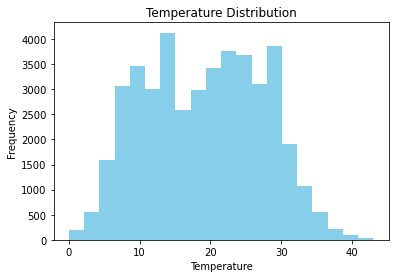

In [ ]:
import matplotlib.pyplot as plt

# Histogram for temperature distribution
plt.hist(df['temperature'], bins=20, color='skyblue')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()


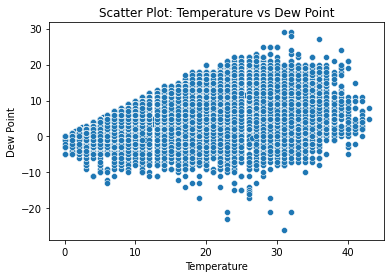

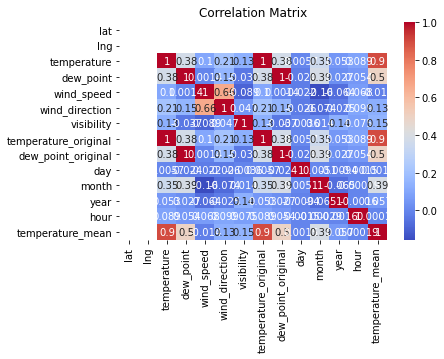

In [ ]:
import seaborn as sns

# Scatter plot between temperature and dew_point
sns.scatterplot(x='temperature', y='dew_point', data=df)
plt.xlabel('Temperature')
plt.ylabel('Dew Point')
plt.title('Scatter Plot: Temperature vs Dew Point')
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


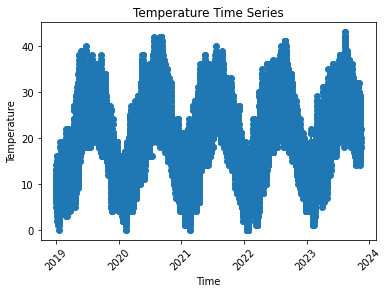

In [ ]:
# Plot time series data
plt.plot(df['time'], df['temperature'], marker='o')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Time Series')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calculate the IQR for the 'temperature' column
import numpy as np

Q1_temp = df['temperature'].quantile(0.25)
Q3_temp = df['temperature'].quantile(0.75)
IQR_temp = Q3_temp - Q1_temp

# Define the outlier threshold for 'temperature'
outlier_threshold_temp = 1.5

# Identify outliers using the IQR method for 'temperature'
outliers_temp = (df['temperature'] < (Q1_temp - outlier_threshold_temp * IQR_temp)) | (df['temperature'] > (Q3_temp + outlier_threshold_temp * IQR_temp))

# Replace outliers with NaN values
df.loc[outliers_temp, 'temperature'] = np.nan

# Alternatively, you can drop rows with outliers
# df_cleaned = df[~outliers_temp]

# Count the number of outliers dropped or replaced
num_outliers_temp = outliers_temp.sum()
print(f"Number of outliers in 'temperature' column: {num_outliers_temp}")


Number of outliers in 'temperature' column: 0


In [ ]:
df

,time,lat,lng,identifier,temperature,dew_point,wind_speed,wind_direction,visibility,temperature_original,dew_point_original,day,month,year,hour,temperature_mean
0,2019-01-01 00:00:00+00:00,31.983299,35.983299,icao:OJAM,7.0,3.0,1.54,120.0,5000.0,7.0,3.0,1,1,2019,0,NaN
3,2019-01-01 01:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,3.0,1.54,120.0,9999.0,8.0,3.0,1,1,2019,1,NaN
6,2019-01-01 02:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,3.0,1.54,120.0,9999.0,8.0,3.0,1,1,2019,2,NaN
9,2019-01-01 04:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,2.0,2.57,150.0,9999.0,8.0,2.0,1,1,2019,4,NaN
12,2019-01-01 05:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,2.0,3.60,130.0,9999.0,8.0,2.0,1,1,2019,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44254,2023-11-12 04:00:00+00:00,31.983299,35.983299,icao:OJAM,19.0,9.0,1.03,145.0,5000.0,19.0,9.0,12,11,2023,4,20.166667
44255,2023-11-12 04:25:00+00:00,31.983299,35.983299,icao:OJAM,18.0,9.0,0.00,0.0,3000.0,18.0,9.0,12,11,2023,4,20.291667
44256,2023-11-12 05:00:00+00:00,31.983299,35.983299,icao:OJAM,18.0,9.0,0.00,0.0,3000.0,18.0,9.0,12,11,2023,5,20.375000
44257,2023-11-12 06:00:00+00:00,31.983299,35.983299,icao:OJAM,20.0,9.0,0.00,0.0,3000.0,20.0,9.0,12,11,2023,6,20.458333


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Replace 'df' with the actual name of your DataFrame if different

# List of columns to check for null values
columns_to_check = ['lat', 'lng', 'identifier', 'temperature', 'dew_point', 'wind_speed',
                    'wind_direction', 'visibility', 'temperature_original', 'dew_point_original',
                    'day', 'month', 'year', 'hour', 'temperature_mean']

# Calculate the count of null values for each column in the list
null_counts = df[columns_to_check].isnull().sum()

# Print the count of null values in each specified column
print("Null Value Counts:")
print(null_counts)


Null Value Counts:
lat                      0
lng                      0
identifier               0
temperature              0
dew_point                0
wind_speed               0
wind_direction           0
visibility               0
temperature_original     0
dew_point_original       0
day                      0
month                    0
year                     0
hour                     0
temperature_mean        23
dtype: int64


In [ ]:

# Drop rows with null values in the 'temperature_mean' column
df.dropna(subset=['temperature_mean'], inplace=True)

# Print the updated DataFrame to verify
print(df)


                           time        lat        lng identifier  temperature  \
68    2019-01-02 00:00:00+00:00  31.983299  35.983299  icao:OJAM          7.0   
71    2019-01-02 01:00:00+00:00  31.983299  35.983299  icao:OJAM          7.0   
74    2019-01-02 02:00:00+00:00  31.983299  35.983299  icao:OJAM          7.0   
77    2019-01-02 03:00:00+00:00  31.983299  35.983299  icao:OJAM          6.0   
80    2019-01-02 04:00:00+00:00  31.983299  35.983299  icao:OJAM          6.0   
...                         ...        ...        ...        ...          ...   
44254 2023-11-12 04:00:00+00:00  31.983299  35.983299  icao:OJAM         19.0   
44255 2023-11-12 04:25:00+00:00  31.983299  35.983299  icao:OJAM         18.0   
44256 2023-11-12 05:00:00+00:00  31.983299  35.983299  icao:OJAM         18.0   
44257 2023-11-12 06:00:00+00:00  31.983299  35.983299  icao:OJAM         20.0   
44258 2023-11-12 07:00:00+00:00  31.983299  35.983299  icao:OJAM         22.0   

       dew_point  wind_spee

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(column_name):
    result = adfuller(df[column_name])
    print(f'{column_name} ADF Statistic:', result[0])
    print(f'{column_name} p-value:', result[1])
    print(f'{column_name} Critical Values:', result[4])

# Check stationarity for each variable
check_stationarity('temperature')
# Add other variables as needed


temperature ADF Statistic: -6.1424316705213755
temperature p-value: 7.912033191943885e-08
temperature Critical Values: {'1%': -3.430501371168215, '5%': -2.8616069027156428, '10%': -2.5668056101432453}


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load the data
df = pd.read_csv("jordan-airports-historical-observations.csv")

# Convert 'time' column to datetime format if it exists
if 'time' in df.columns:
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)

# Function to check stationarity
def check_stationarity(series, column_name):
    result = adfuller(series.dropna())
    print(f'{column_name} ADF Statistic: {result[0]}')
    print(f'{column_name} p-value: {result[1]}')
    print(f'{column_name} Critical Values: {result[4]}')
    if result[1] < 0.05:
        print(f'{column_name} is stationary.\n')
    else:
        print(f'{column_name} is not stationary.\n')

# List of columns to check
columns_to_check = ['temperature', 'dew_point', 'wind_speed', 'wind_direction', 'visibility']

# Check stationarity for each specified column
for column in columns_to_check:
    if column in df.columns:
        check_stationarity(df[column], column)
    else:
        print(f"Column {column} does not exist in the DataFrame.\n")


temperature ADF Statistic: -9.206123775838792
temperature p-value: 1.9428118715626894e-15
temperature Critical Values: {'1%': -3.4303994059943967, '5%': -2.8615618367343143, '10%': -2.566781622919306}
temperature is stationary.

dew_point ADF Statistic: -16.593540534091776
dew_point p-value: 1.7901564514690554e-29
dew_point Critical Values: {'1%': -3.4303994063676737, '5%': -2.861561836899296, '10%': -2.5667816230071203}
dew_point is stationary.

wind_speed ADF Statistic: -29.63526193020645
wind_speed p-value: 0.0
wind_speed Critical Values: {'1%': -3.4303992864632544, '5%': -2.8615617839037184, '10%': -2.566781594799377}
wind_speed is stationary.

wind_direction ADF Statistic: -25.41621635412689
wind_direction p-value: 0.0
wind_direction Critical Values: {'1%': -3.430399943699247, '5%': -2.8615620743900743, '10%': -2.5667817494153877}
wind_direction is stationary.

visibility ADF Statistic: -24.656009497269668
visibility p-value: 0.0
visibility Critical Values: {'1%': -3.4303993098769

In [ ]:
df

,lat,lng,identifier,temperature,dew_point,wind_speed,wind_direction,visibility
time,,,,,,,,
2019-01-01 00:00:00+00:00,31.983299,35.983299,icao:OJAM,7.0,3.0,1.54,120.0,5000.0
2019-01-01 00:00:00+00:00,31.983299,35.983299,icao:OJAM,7.0,3.0,1.54,120.0,5000.0
2019-01-01 00:00:00+00:00,31.983299,35.983299,icao:OJAM,7.0,3.0,1.54,120.0,5000.0
2019-01-01 01:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,3.0,1.54,120.0,9999.0
2019-01-01 01:00:00+00:00,31.983299,35.983299,icao:OJAM,8.0,3.0,1.54,120.0,9999.0
...,...,...,...,...,...,...,...,...
2023-11-12 04:00:00+00:00,31.983299,35.983299,icao:OJAM,19.0,9.0,1.03,NaN,5000.0
2023-11-12 04:25:00+00:00,31.983299,35.983299,icao:OJAM,18.0,9.0,0.00,0.0,3000.0
2023-11-12 05:00:00+00:00,31.983299,35.983299,icao:OJAM,18.0,9.0,0.00,0.0,3000.0


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the data and check column names
df = pd.read_csv("jordan-airports-historical-observations.csv")
print(df.columns)  # Check if 'time' column exists

# Ensure 'time' column is in datetime format and set as index
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Sort the DataFrame by index to ensure it's in chronological order
df = df.sort_index()

# Resample the data to weekly frequency, taking the mean for each week
data = df['temperature'].resample('W').mean()

# Split the data into train and test sets
split_date = '2023-01-01'
train = data[:split_date]
test = data[split_date:]

# Fit the SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_model = model.fit(disp=False)

# Forecasting for the whole year of 2024
forecast_steps = 52  # Number of weeks in 2024
forecast_start = pd.to_datetime('2024-01-07')  # First Sunday of 2024
forecast_end = pd.to_datetime('2024-12-29')  # Last Sunday of 2024
forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq='W')
forecast = sarima_model.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_values.index = forecast_index
forecast_conf_int = forecast.conf_int()
forecast_conf_int.index = forecast_index

# Evaluation for 2023
forecast_2023 = sarima_model.get_forecast(steps=len(test))
forecast_values_2023 = forecast_2023.predicted_mean
mae = mean_absolute_error(test, forecast_values_2023)
rmse = np.sqrt(mean_squared_error(test, forecast_values_2023))

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Print the first few forecasted values for 2024
forecast_df = pd.DataFrame({'Forecasted Temperature': forecast_values,
                            'Lower Confidence Interval': forecast_conf_int.iloc[:, 0],
                            'Upper Confidence Interval': forecast_conf_int.iloc[:, 1]})
print(forecast_df.head(10))

# Save the forecasted values and confidence intervals for 2024 to a CSV file
forecast_df.to_csv('forecasted_temperature_2024.csv')


Index(['time', 'lat', 'lng', 'identifier', 'temperature', 'dew_point',
       'wind_speed', 'wind_direction', 'visibility'],
      dtype='object')


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error (MAE): 2.206013347386945
Root Mean Squared Error (RMSE): 2.7656954899027357
            Forecasted Temperature  Lower Confidence Interval  \
2024-01-07                9.432461                   4.963679   
2024-01-14                9.740323                   5.053644   
2024-01-21                7.349017                   2.631091   
2024-01-28                8.648787                   3.922262   
2024-02-04               10.236900                   5.505886   
2024-02-11               10.518506                   5.783982   
2024-02-18                9.027854                   4.290084   
2024-02-25               10.683553                   5.942611   
2024-03-03               11.681107                   6.937016   
2024-03-10               13.051635                   8.304402   

            Upper Confidence Interval  
2024-01-07                  13.901242  
2024-01-14                  14.427001  
2024-01-21                  12.066942  
2024-01-28                  

Index(['time', 'lat', 'lng', 'identifier', 'temperature', 'dew_point',
       'wind_speed', 'wind_direction', 'visibility'],
      dtype='object')


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error (MAE): 2.206013347386945
Root Mean Squared Error (RMSE): 2.7656954899027357


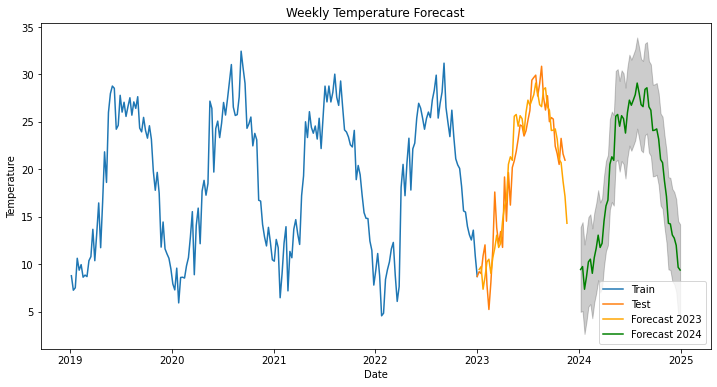

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the data and check column names
df = pd.read_csv("jordan-airports-historical-observations.csv")
print(df.columns)  # Check if 'time' column exists

# Ensure 'time' column is in datetime format and set as index
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Sort the DataFrame by index to ensure it's in chronological order
df = df.sort_index()

# Resample the data to weekly frequency, taking the mean for each week
data = df['temperature'].resample('W').mean()

# Split the data into train and test sets
split_date = '2023-01-01'
train = data[:split_date]
test = data[split_date:]

# Fit the SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_model = model.fit(disp=False)

# Forecasting for the whole year of 2024
forecast_steps = 52  # Number of weeks in 2024
forecast_start = pd.to_datetime('2024-01-07')  # First Sunday of 2024
forecast_end = pd.to_datetime('2024-12-29')  # Last Sunday of 2024
forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq='W')
forecast = sarima_model.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_values.index = forecast_index
forecast_conf_int = forecast.conf_int()
forecast_conf_int.index = forecast_index

# Evaluation for 2023
forecast_2023 = sarima_model.get_forecast(steps=len(test))
forecast_values_2023 = forecast_2023.predicted_mean
mae = mean_absolute_error(test, forecast_values_2023)
rmse = np.sqrt(mean_squared_error(test, forecast_values_2023))

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_values_2023, label='Forecast 2023', color='orange')
plt.plot(forecast_values, label='Forecast 2024', color='green')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='k', alpha=.2)
plt.title('Weekly Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the data and check column names
df = pd.read_csv("jordan-airports-historical-observations.csv")
print(df.columns)  # Check if 'time' column exists

# Ensure 'time' column is in datetime format and set as index
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Sort the DataFrame by index to ensure it's in chronological order
df = df.sort_index()

# Resample the data to weekly frequency, taking the mean for each week
data = df['temperature'].resample('W').mean()

# Split the data into train and test sets
split_date = '2023-01-01'
train = data[:split_date]
test = data[split_date:]

# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Adjust the order (p, d, q) as needed
arima_model = model.fit()

# Forecasting for the whole year of 2024
forecast_steps = 52  # Number of weeks in 2024
forecast_start = pd.to_datetime('2024-01-07')  # First Sunday of 2024
forecast_end = pd.to_datetime('2024-12-29')  # Last Sunday of 2024
forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq='W')
forecast = arima_model.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_values.index = forecast_index
forecast_conf_int = forecast.conf_int()
forecast_conf_int.index = forecast_index

# Evaluation for 2023
forecast_2023 = arima_model.get_forecast(steps=len(test))
forecast_values_2023 = forecast_2023.predicted_mean
mae = mean_absolute_error(test, forecast_values_2023)
rmse = np.sqrt(mean_squared_error(test, forecast_values_2023))

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Print the first few forecasted values for 2024
forecast_df = pd.DataFrame({'Forecasted Temperature': forecast_values,
                            'Lower Confidence Interval': forecast_conf_int.iloc[:, 0],
                            'Upper Confidence Interval': forecast_conf_int.iloc[:, 1]})
print(forecast_df.head(10))

# Save the forecasted values and confidence intervals for 2024 to a CSV file
forecast_df.to_csv('forecasted_temperature_2024.csv')


Index(['time', 'lat', 'lng', 'identifier', 'temperature', 'dew_point',
       'wind_speed', 'wind_direction', 'visibility'],
      dtype='object')
Mean Absolute Error (MAE): 11.895831777122114
Root Mean Squared Error (RMSE): 13.730632726735111
            Forecasted Temperature  Lower Confidence Interval  \
2024-01-07                9.503814                   4.378386   
2024-01-14                9.366115                   2.716224   
2024-01-21                8.686706                   1.123608   
2024-01-28                8.447232                  -0.420143   
2024-02-04                8.487110                  -1.717312   
2024-02-11                8.465624                  -2.920083   
2024-02-18                8.330682                  -4.099300   
2024-02-25                8.275669                  -5.173257   
2024-03-03                8.287175                  -6.153455   
2024-03-10                8.273846                  -7.088510   

            Upper Confidence Interval  


Index(['time', 'lat', 'lng', 'identifier', 'temperature', 'dew_point',
       'wind_speed', 'wind_direction', 'visibility'],
      dtype='object')


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error (MAE): 2.25064138351406
Root Mean Squared Error (RMSE): 2.821760189046535
            Forecasted Temperature  Lower Confidence Interval  \
2024-01-07                9.761610                   4.913656   
2024-01-14               10.048355                   4.636228   
2024-01-21                7.417043                   1.890362   
2024-01-28                8.884589                   3.180119   
2024-02-04               10.643954                   4.788644   
2024-02-11               10.617391                   4.623914   
2024-02-18                9.425126                   3.053753   
2024-02-25               11.111115                   4.447498   
2024-03-03               12.072698                   5.220843   
2024-03-10               12.996076                   5.955000   

            Upper Confidence Interval  
2024-01-07                  14.609564  
2024-01-14                  15.460482  
2024-01-21                  12.943723  
2024-01-28                  14

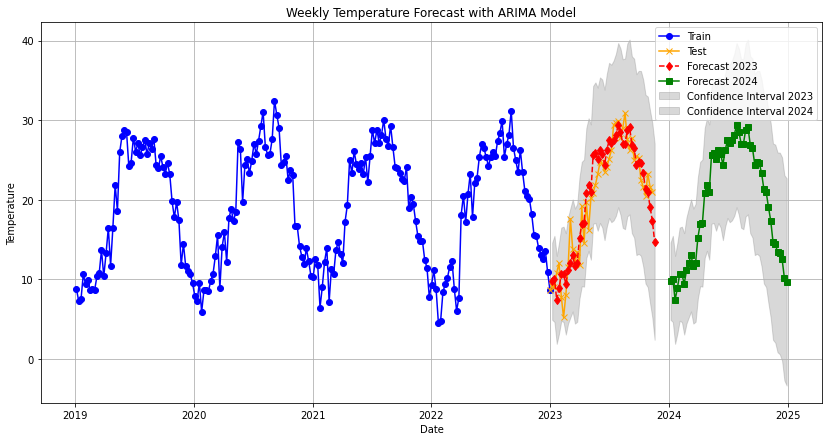

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the data and check column names
df = pd.read_csv("jordan-airports-historical-observations.csv")
print(df.columns)  # Check if 'time' column exists

# Ensure 'time' column is in datetime format and set as index
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Sort the DataFrame by index to ensure it's in chronological order
df = df.sort_index()

# Resample the data to weekly frequency, taking the mean for each week
data = df['temperature'].resample('W').mean()

# Split the data into train and test sets
split_date = '2023-01-01'
train = data[:split_date]
test = data[split_date:]

# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0), seasonal_order=(1, 1, 1, 52))  # Adjust the order (p, d, q) and seasonal_order (P, D, Q, S) as needed
arima_model = model.fit()

# Forecasting for the test period
forecast_2023 = arima_model.get_forecast(steps=len(test))
forecast_values_2023 = forecast_2023.predicted_mean
forecast_conf_int_2023 = forecast_2023.conf_int()

# Forecasting for the whole year of 2024
forecast_steps = 52  # Number of weeks in 2024
forecast_2024 = arima_model.get_forecast(steps=forecast_steps)
forecast_values_2024 = forecast_2024.predicted_mean
forecast_conf_int_2024 = forecast_2024.conf_int()

# Create a date range for the 2024 forecast
forecast_index_2024 = pd.date_range(start='2024-01-07', periods=forecast_steps, freq='W')
forecast_values_2024.index = forecast_index_2024
forecast_conf_int_2024.index = forecast_index_2024

# Evaluation metrics for 2023 forecast
mae = mean_absolute_error(test, forecast_values_2023)
rmse = np.sqrt(mean_squared_error(test, forecast_values_2023))

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Print the first few forecasted values for 2024
forecast_df = pd.DataFrame({
    'Forecasted Temperature': forecast_values_2024,
    'Lower Confidence Interval': forecast_conf_int_2024.iloc[:, 0],
    'Upper Confidence Interval': forecast_conf_int_2024.iloc[:, 1]
})
print(forecast_df.head(10))

# Save the forecasted values and confidence intervals for 2024 to a CSV file
forecast_df.to_csv('forecasted_temperature_2024.csv')

# Plot the results with accurate seasonal forecasts
plt.figure(figsize=(14, 7))
plt.plot(train, label='Train', color='blue', marker='o')
plt.plot(test, label='Test', color='orange', marker='x')
plt.plot(forecast_values_2023, label='Forecast 2023', color='red', linestyle='--', marker='d')
plt.plot(forecast_values_2024, label='Forecast 2024', color='green', linestyle='-', marker='s')
plt.fill_between(forecast_conf_int_2023.index,
                 forecast_conf_int_2023.iloc[:, 0],
                 forecast_conf_int_2023.iloc[:, 1], color='grey', alpha=.3, label='Confidence Interval 2023')
plt.fill_between(forecast_conf_int_2024.index,
                 forecast_conf_int_2024.iloc[:, 0],
                 forecast_conf_int_2024.iloc[:, 1], color='grey', alpha=.3, label='Confidence Interval 2024')
plt.title('Weekly Temperature Forecast with ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the data and check column names
df = pd.read_csv("jordan-airports-historical-observations.csv")
print(df.columns)  # Check if 'time' column exists

# Ensure 'time' column is in datetime format and set as index
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Sort the DataFrame by index to ensure it's in chronological order
df = df.sort_index()

# Resample the data to weekly frequency, taking the mean for each week
data = df['temperature'].resample('W').mean()

# Split the data into train and test sets
split_date = '2023-01-01'
train = data[:split_date]
test = data[split_date:]

# Fit the Exponential Smoothing (Holt-Winters) model
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=52)
hw_model = model.fit()

# Forecasting for the whole year of 2024
forecast_steps = 52  # Number of weeks in 2024
forecast_start = pd.to_datetime('2024-01-07')  # First Sunday of 2024
forecast_end = pd.to_datetime('2024-12-29')  # Last Sunday of 2024
forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq='W')
forecast_values = hw_model.forecast(steps=forecast_steps)
forecast_values.index = forecast_index

# Evaluation for 2023
forecast_2023 = hw_model.forecast(steps=len(test))
mae = mean_absolute_error(test, forecast_2023)
rmse = np.sqrt(mean_squared_error(test, forecast_2023))

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Print the first few forecasted values for 2024
forecast_df = pd.DataFrame({'Forecasted Temperature': forecast_values})
print(forecast_df.head(10))

# Save the forecasted values for 2024 to a CSV file
forecast_df.to_csv('forecasted_temperature_2024_hw.csv')


Index(['time', 'lat', 'lng', 'identifier', 'temperature', 'dew_point',
       'wind_speed', 'wind_direction', 'visibility'],
      dtype='object')


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Mean Absolute Error (MAE): 2.2757895439531937
Root Mean Squared Error (RMSE): 2.812740478964236
            Forecasted Temperature
2024-01-07                9.757996
2024-01-14                9.590158
2024-01-21                7.078697
2024-01-28                8.148627
2024-02-04                9.985215
2024-02-11               10.325048
2024-02-18                9.211010
2024-02-25               10.774343
2024-03-03               11.747399
2024-03-10               12.401099


Index(['time', 'lat', 'lng', 'identifier', 'temperature', 'dew_point',
       'wind_speed', 'wind_direction', 'visibility'],
      dtype='object')


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Mean Absolute Error (MAE): 2.2757895439531937
Root Mean Squared Error (RMSE): 2.812740478964236


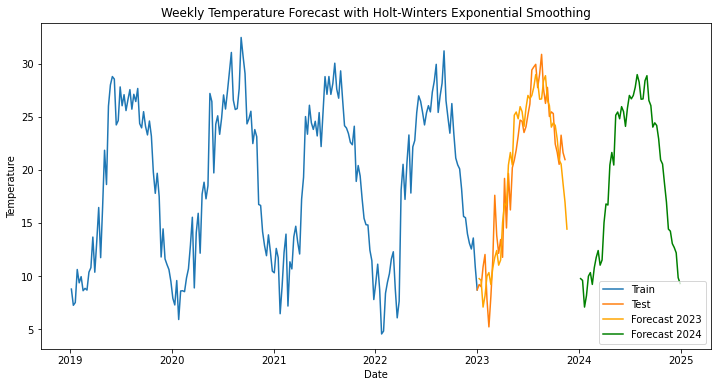

In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the data and check column names
df = pd.read_csv("jordan-airports-historical-observations.csv")
print(df.columns)  # Check if 'time' column exists

# Ensure 'time' column is in datetime format and set as index
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Sort the DataFrame by index to ensure it's in chronological order
df = df.sort_index()

# Resample the data to weekly frequency, taking the mean for each week
data = df['temperature'].resample('W').mean()

# Split the data into train and test sets
split_date = '2023-01-01'
train = data[:split_date]
test = data[split_date:]

# Fit the Exponential Smoothing (Holt-Winters) model
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=52)
hw_model = model.fit()

# Forecasting for the whole year of 2024
forecast_steps = 52  # Number of weeks in 2024
forecast_start = pd.to_datetime('2024-01-07')  # First Sunday of 2024
forecast_end = pd.to_datetime('2024-12-29')  # Last Sunday of 2024
forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq='W')
forecast_values = hw_model.forecast(steps=forecast_steps)
forecast_values.index = forecast_index

# Evaluation for 2023
forecast_2023 = hw_model.forecast(steps=len(test))
mae = mean_absolute_error(test, forecast_2023)
rmse = np.sqrt(mean_squared_error(test, forecast_2023))

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_2023, label='Forecast 2023', color='orange')
plt.plot(forecast_values, label='Forecast 2024', color='green')
plt.title('Weekly Temperature Forecast with Holt-Winters Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Save the forecasted values for 2024 to a CSV file
forecast_df = pd.DataFrame({'Forecasted Temperature': forecast_values})
forecast_df.to_csv('forecasted_temperature_2024_hw.csv')


In [ ]:
!pip install ipywidgets


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Load the data
df = pd.read_csv("jordan-airports-historical-observations.csv")
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df = df.sort_index()
data = df['temperature'].resample('W').mean()

# Split the data into train and test sets
split_date = '2023-01-01'
train = data[:split_date]
test = data[split_date:]

# Define widget elements
model_selector = widgets.Dropdown(
    options=['SARIMA', 'ARIMA', 'Holt-Winters'],
    value='SARIMA',
    description='Model:',
)
forecast_button = widgets.Button(
    description='Run Forecast',
    button_style='success'
)
output = widgets.Output()

# Define the function to run the selected model and display results
def run_forecast(button):
    with output:
        output.clear_output()
        model_name = model_selector.value

        if model_name == 'SARIMA':
            model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
            sarima_model = model.fit(disp=False)
            forecast = sarima_model.get_forecast(steps=52)
            forecast_values = forecast.predicted_mean
            forecast_conf_int = forecast.conf_int()

        elif model_name == 'ARIMA':
            model = ARIMA(train, order=(5, 1, 0))
            arima_model = model.fit()
            forecast = arima_model.get_forecast(steps=52)
            forecast_values = forecast.predicted_mean
            forecast_conf_int = forecast.conf_int()

        elif model_name == 'Holt-Winters':
            model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=52)
            hw_model = model.fit()
            forecast_values = hw_model.forecast(steps=52)

        forecast_start = pd.to_datetime('2024-01-07')
        forecast_end = pd.to_datetime('2024-12-29')
        forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq='W')
        forecast_values.index = forecast_index
        if model_name in ['SARIMA', 'ARIMA']:
            forecast_conf_int.index = forecast_index

        # Evaluation for 2023
        if model_name == 'SARIMA':
            forecast_2023 = sarima_model.get_forecast(steps=len(test))
        elif model_name == 'ARIMA':
            forecast_2023 = arima_model.get_forecast(steps=len(test))
        elif model_name == 'Holt-Winters':
            forecast_2023 = hw_model.forecast(steps=len(test))

        forecast_values_2023 = forecast_2023.predicted_mean
        mae = mean_absolute_error(test, forecast_values_2023)
        rmse = np.sqrt(mean_squared_error(test, forecast_values_2023))

        # Display evaluation metrics and forecast
        print(f"Model: {model_name}")
        print(f"Mean Absolute Error (MAE): {mae}")
        print(f"Root Mean Squared Error (RMSE): {rmse}")
        print(f"Forecasted values for 2024:")
        display(forecast_values.head(10))

        # Optionally, save to CSV
        forecast_df = pd.DataFrame({'Forecasted Temperature': forecast_values})
        if model_name in ['SARIMA', 'ARIMA']:
            forecast_df['Lower Confidence Interval'] = forecast_conf_int.iloc[:, 0]
            forecast_df['Upper Confidence Interval'] = forecast_conf_int.iloc[:, 1]
        forecast_df.to_csv(f'forecasted_temperature_2024_{model_name.lower()}.csv')

forecast_button.on_click(run_forecast)

# Display the widgets
display(model_selector, forecast_button, output)


Dropdown(description='Model:', options=('SARIMA', 'ARIMA', 'Holt-Winters'), value='SARIMA')

Button(button_style='success', description='Run Forecast', style=ButtonStyle())

Output()

In [6]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Load the data
df = pd.read_csv("jordan-airports-historical-observations.csv")
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df = df.sort_index()
data = df['temperature'].resample('W').mean()

# Split the data into train and test sets
split_date = '2023-01-01'
train = data[:split_date]
test = data[split_date:]

# Define the forecast range
forecast_start = pd.to_datetime('2024-01-07')
forecast_end = pd.to_datetime('2024-12-29')

# Define widget elements
model_selector = widgets.Dropdown(
    options=['SARIMA', 'ARIMA', 'Holt-Winters'],
    value='SARIMA',
    description='Model:',
)
date_picker = widgets.DatePicker(
    description='Date:',
    disabled=False,
    min=forecast_start,
    max=forecast_end
)
forecast_button = widgets.Button(
    description='Get Forecast',
    button_style='success'
)
output = widgets.Output()

# Define the function to run the selected model and display results
def run_forecast(button):
    with output:
        output.clear_output()
        model_name = model_selector.value
        selected_date = date_picker.value

        if selected_date is None:
            print("Please select a date.")
            return

        selected_date = pd.Timestamp(selected_date)

        if selected_date < forecast_start or selected_date > forecast_end:
            print("Selected date is out of the forecast range.")
            return

        # Forecasting setup
        forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq='W')

        try:
            if model_name == 'SARIMA':
                model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52), enforce_stationarity=False, enforce_invertibility=False)
                sarima_model = model.fit(disp=False)
                forecast = sarima_model.get_forecast(steps=52)
                forecast_values = forecast.predicted_mean

            elif model_name == 'ARIMA':
                model = ARIMA(train, order=(5, 1, 0))
                arima_model = model.fit()
                forecast = arima_model.get_forecast(steps=52)
                forecast_values = forecast.predicted_mean

            elif model_name == 'Holt-Winters':
                model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=52, initialization_method="estimated")
                hw_model = model.fit()
                forecast_values = hw_model.forecast(steps=52)

            forecast_values.index = forecast_index

            # Map the selected date to the nearest forecasted date
            nearest_forecast_date = min(forecast_index, key=lambda d: abs(d - selected_date))

            # Debugging: print forecast dates and selected date
            print("Forecast range:", forecast_start, "to", forecast_end)
            print("Selected date:", selected_date)
            print("Nearest forecast date:", nearest_forecast_date)
            print("Forecast index range:", forecast_values.index.min(), "to", forecast_values.index.max())

            # Find the forecasted temperature for the nearest forecast date
            if nearest_forecast_date in forecast_values.index:
                temperature_forecast = forecast_values[nearest_forecast_date]
                print(f"Forecasted temperature for {nearest_forecast_date.date()}: {temperature_forecast:.2f}°C")
            else:
                print("Selected date is out of the forecast range.")

        except Exception as e:
            print(f"Error fitting the {model_name} model: {e}")

forecast_button.on_click(run_forecast)

# Display the widgets
display(model_selector, date_picker, forecast_button, output)


Dropdown(description='Model:', options=('SARIMA', 'ARIMA', 'Holt-Winters'), value='SARIMA')

DatePicker(value=None, description='Date:')

Button(button_style='success', description='Get Forecast', style=ButtonStyle())

Output()

In [7]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [16]:
%%writefile app.py
import streamlit as st
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import datetime

# Load and prepare data
df = pd.read_csv("jordan-airports-historical-observations.csv")
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df = df.sort_index()
data = df['temperature'].resample('W').mean()

# Split data
split_date = '2023-01-01'
train = data[:split_date]
forecast_start = pd.to_datetime('2024-01-07')
forecast_end = pd.to_datetime('2024-12-29')
forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq='W')

# Streamlit UI
st.title("Weekly Temperature Forecast")
model_name = st.selectbox("Select Model", ['SARIMA', 'ARIMA', 'Holt-Winters'])
date_input = st.date_input("Select a date", min_value=forecast_start, max_value=forecast_end)

if st.button("Get Forecast"):
    if model_name == 'SARIMA':
        model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52),
                        enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=False)
        forecast = model_fit.get_forecast(steps=52).predicted_mean
    elif model_name == 'ARIMA':
        model = ARIMA(train, order=(5, 1, 0))
        model_fit = model.fit()
        forecast = model_fit.get_forecast(steps=52).predicted_mean
    elif model_name == 'Holt-Winters':
        model = ExponentialSmoothing(train, trend='add', seasonal='add',
                                     seasonal_periods=52, initialization_method="estimated")
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=52)

    forecast.index = forecast_index
    selected_date = pd.Timestamp(date_input)
    nearest_date = min(forecast.index, key=lambda d: abs(d - selected_date))

    if nearest_date in forecast.index:
        st.success(f"Forecasted temperature for {nearest_date.date()}: {forecast[nearest_date]:.2f}°C")
    else:
        st.error("Selected date is out of forecast range.")


Overwriting app.py


In [17]:
!streamlit run app.py &> /dev/null &



In [10]:
!streamlit run app.py &>/content/logs.txt &


In [11]:
!pip install pyngrok


In [13]:
from pyngrok import ngrok
ngrok.set_auth_token("2waUQo4mvTEkpDFPLKrvtNyrzNg_3bS41yDT4HLL4KAcmtvFt")


In [18]:
from pyngrok import ngrok

# Use your authtoken first (only once)
ngrok.set_auth_token("2waUQo4mvTEkpDFPLKrvtNyrzNg_3bS41yDT4HLL4KAcmtvFt")  # Only needed once

public_url = ngrok.connect(8501)
print(f"🌐 Streamlit app is live at: {public_url}")


🌐 Streamlit app is live at: NgrokTunnel: "https://3eb4-34-169-136-161.ngrok-free.app" -> "http://localhost:8501"
